#Get dependencies

In [2]:
import pandas as pd
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import numpy as np

#Create mock data

In [3]:
data = pd.DataFrame({'P_Movies': [17,64,18,20,38,49,55,25,29,31,33],
             'Gender': [1,0,1,0,1,0,0,1,1,0,1]})
data =data.sort_values('P_Movies')
data

,P_Movies,Gender
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


#Helper code to visualize tree

In [4]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

#Train tree and get predictions

In [9]:
#define Decision Tree
dt = DecisionTreeClassifier(criterion = 'entropy')
#Define input vectors
#X is the features in this dataset
X = data['P_Movies'].values.reshape(-1, 1)
#Y is the vector with our Target Variables
Y = data['Gender'].values
#start fitting process
dt.fit(X, Y)

tree_graph_to_png(dt, feature_names=['P_Movies'],
                 png_file_to_save='dt.png')

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.42857142857142855, 0.9166666666666666, 'P_Movies <= 43.5\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]'),
 Text(0.2857142857142857, 0.75, 'P_Movies <= 19.0\nentropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(0.3571428571428571, 0.8333333333333333, 'True  '),
 Text(0.14285714285714285, 0.5833333333333334, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.42857142857142855, 0.5833333333333334, 'P_Movies <= 22.5\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(0.2857142857142857, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5714285714285714, 0.4166666666666667, 'P_Movies <= 30.0\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.42857142857142855, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7142857142857143, 0.25, 'P_Movies <= 32.0\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5714285714285714, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8571428571428571, 0.08333333333333

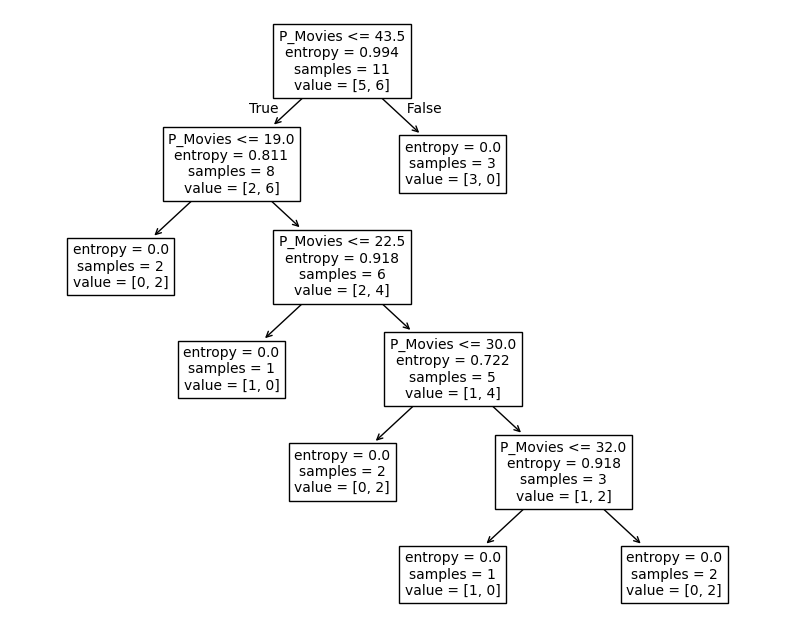

In [11]:
plt.figure(figsize=(10,8))
tree.plot_tree(dt, feature_names=['P_Movies'], fontsize=10)

Entropy measures the impurity or uncertainty present in the data.

$$
\mathcal{H}(S) = - \sum_{i=1}^N p_i \log_2 p_i
$$

where
- $S$ is the set of instances
- $N$ is the sample size
- $p_i$ is event probability

In [12]:
d = np.array([7, 15, 43, 45])
d = d.reshape(-1, 1)
dt.predict(d)

array([1, 1, 1, 0])

In [13]:
d

array([[ 7],
       [15],
       [43],
       [45]])

In [16]:
Y_hat = dt.predict(X)

In [14]:
def plot_scatter(x, y):
  plt.scatter(X, Y, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()

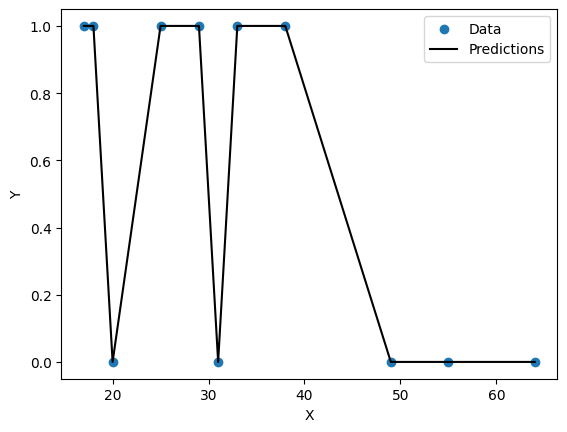

In [17]:
plot_scatter(X, Y_hat)

In [18]:
Y - Y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])